In [30]:
from keras.datasets import fashion_mnist
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
import tensorflow as tf
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [5]:


# Load the MNIST dataset
digits = load_digits()
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)


In [6]:
# Print the shape of the data to confirm the split
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (1437, 64)
Test set shape: (360, 64)


In [7]:
# Flatten the image data
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)


In [8]:
# Scale the pixel values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flattened)
X_test_scaled = scaler.transform(X_test_flattened)

In [9]:
# Create and train SVM models with different kernels
# Linear Kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [10]:
# RBF Kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train_scaled, y_train)


SVC()

In [11]:
# Polynomial Kernel (degree=3)
svm_poly = SVC(kernel='poly', degree=3)
svm_poly.fit(X_train_scaled, y_train)

SVC(kernel='poly')

In [12]:
# Make predictions on the test set using each model
y_pred_linear = svm_linear.predict(X_test_scaled)
y_pred_rbf = svm_rbf.predict(X_test_scaled)
y_pred_poly = svm_poly.predict(X_test_scaled)
# Calculate and print accuracy for each model
print("Linear Kernel Accuracy: ", accuracy_score(y_test, y_pred_linear))
print("RBF Kernel Accuracy: ", accuracy_score(y_test, y_pred_rbf))
print("Polynomial Kernel Accuracy: ", accuracy_score(y_test, y_pred_poly))


Linear Kernel Accuracy:  0.975
RBF Kernel Accuracy:  0.9805555555555555
Polynomial Kernel Accuracy:  0.9638888888888889


Accuracy for Linear Kernel: 0.9750


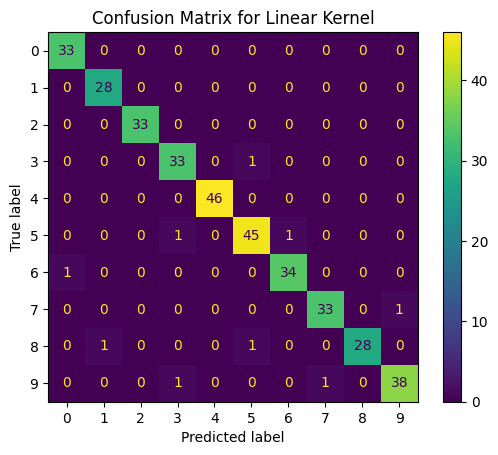

Accuracy for RBF Kernel: 0.9806


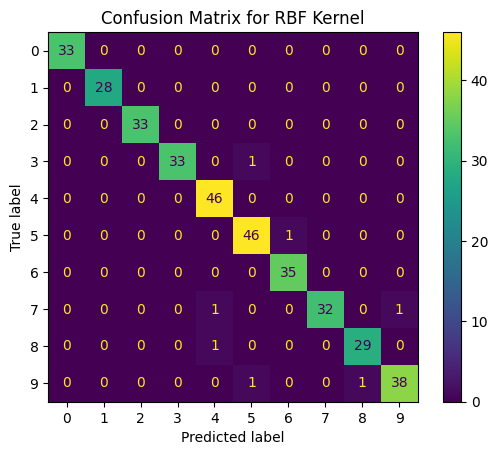

Accuracy for Polynomial Kernel: 0.9639


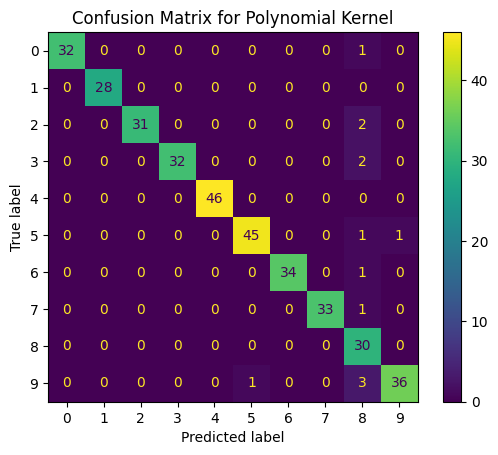

In [23]:
# Function to evaluate and display results
def evaluate_model(model, X_test, y_test, kernel_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"Accuracy for {kernel_name} Kernel: {accuracy:.4f}")
    
    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Confusion Matrix for {kernel_name} Kernel")
    plt.show()
    # Evaluate and display results for each model
evaluate_model(svm_linear, X_test_scaled, y_test, "Linear")
evaluate_model(svm_rbf, X_test_scaled, y_test, "RBF")
evaluate_model(svm_poly, X_test_scaled, y_test, "Polynomial")

In [25]:
# Define the parameter grid for RBF kernel SVR
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10]
}
# Create GridSearchCV object
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10]},
             scoring='neg_mean_squared_error')

In [26]:
# Fit the GridSearchCV to the data
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10]},
             scoring='neg_mean_squared_error')

In [27]:
# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters for RBF kernel: {best_params}")
print(f"Best cross-validation score (negative MSE): {best_score:.2f}")

Best parameters for RBF kernel: {'C': 100, 'gamma': 0.01}
Best cross-validation score (negative MSE): -0.83


In [31]:
# Evaluate the tuned model on the test set
best_svr_model = grid_search.best_estimator_
y_pred_best_svr = best_svr_model.predict(X_test_scaled)

mse_best_svr = mean_squared_error(y_test, y_pred_best_svr)
mae_best_svr = mean_absolute_error(y_test, y_pred_best_svr)
r2_best_svr = r2_score(y_test, y_pred_best_svr)

print("\nTuned RBF Kernel SVR Metrics:")
print(f"Mean Squared Error: {mse_best_svr:.2f}")
print(f"Mean Absolute Error: {mae_best_svr:.2f}")
print(f"R-squared: {r2_best_svr:.2f}")


Tuned RBF Kernel SVR Metrics:
Mean Squared Error: 0.56
Mean Absolute Error: 0.53
R-squared: 0.93
